In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.linalg import expm, logm
import gvar as gv
import matplotlib as mpl
from  matplotlib import rc, cm
from scipy.optimize import curve_fit
from matplotlib.colors import ListedColormap
import lsqfit
import matplotlib.pyplot as plt

colorsrgb = [(0, 0, 0), (230, 159, 0), (86, 180, 233),
          (0, 158, 115), (240, 228, 66), (0, 114, 178),
          (213, 94, 0), (204, 121, 167)]

fmts = ['o', 'd', 's', '^', '<', '8', '6', 'd', 'x']
colors = [tuple([el / 255 for el in c]) for c in colorsrgb]

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "Times New Roman"
mpl.rcParams.keys()
# mpl.rcParams["text.fontset"] = "Times New Roman"
mpl.rcParams["mathtext.fontset"] = "stix"

In [2]:
data_file = open("ProcessedData/ProcessedData/m=1ns=2/finalreadoutdynamicdecouplingandrescaling_nairobi.csv")
data = np.loadtxt(data_file)
data_file.close()
data_gvarm1n2 = gv.gvar(data[0],data[1:])
data_file = open("ProcessedData/ProcessedData/m=2ns=2/finalreadoutdynamicdecouplingandrescaling_nairobi.csv")
data = np.loadtxt(data_file)
data_file.close()
data_gvarm2n2 = gv.gvar(data[0],data[1:])
data_file = open("ProcessedData/ProcessedData/m=1ns=4/finalreadoutdynamicdecouplingandrescaling_nairobi.csv")
data = np.loadtxt(data_file)
data_file.close()
data_gvarm1n4 = gv.gvar(data[0],data[1:])
data_file = open("ProcessedData/ProcessedData/m=2ns=4/finalreadoutdynamicdecouplingandrescaling_nairobi.csv")
data = np.loadtxt(data_file)
data_file.close()
data_gvarm2n4 = gv.gvar(data[0],data[1:])

In [3]:
obs = np.array([1.0,
 0.611,
 -0.252,
 -0.8830000000000001,
 -0.8220000000000002,
 -0.10900000000000003,
 0.689,
 0.9960000000000001,
 0.537,
 -0.29799999999999993,
 -0.8810000000000001,
 -0.7659999999999999,
 0.010000000000000009,
 0.7550000000000001,
 0.976,
 0.46199999999999997,
 -0.396,
 -0.9229999999999999,
 -0.7050000000000001,
 0.03600000000000003,
 0.8380000000000001])[1:]
obs2 = np.array([ 0.07578, -0.96702, -0.1758 ,  0.9678 ,  0.32258, -0.90242,
       -0.4158 ,  0.86662,  0.555  , -0.77342, -0.6338 ,  0.71924,
        0.75256, -0.5955 , -0.8066 ,  0.51404,  0.89394, -0.37858,
       -0.92314,  0.27712])
obs3 = np.array([ 1.        ,  0.13671875, -0.86328125,  0.01171875,  0.99023438,
        0.19335938, -0.82617188, -0.10351562,  0.97265625,  0.24414062,
       -0.75976562, -0.09765625,  0.93945312,  0.33984375, -0.74609375,
       -0.15039062,  0.90039062,  0.37109375, -0.6640625 , -0.20703125,
        0.79492188])[1:]

obs4 = np.array([ 0.62042, -0.1735 , -0.65614, -0.39714,  0.36114,  0.92978,
        0.79648,  0.09512, -0.52714, -0.51798,  0.10646,  0.76276,
        0.85798,  0.327  , -0.33226, -0.52226, -0.0963 ,  0.53878,
        0.78854,  0.44262])

e1 = np.array([ 1.00000000e+00,  9.95543257e-01,  9.82217624e-01,  9.60156446e-01,
        9.29580479e-01,  8.90795681e-01,  8.44190147e-01,  7.90230222e-01,
        7.29455828e-01,  6.62475052e-01,  5.89958051e-01,  5.12630332e-01,
        4.31265470e-01,  3.46677351e-01,  2.59711994e-01,  1.71239063e-01,
        8.21431233e-02, -6.68523999e-03, -9.43583774e-02, -1.80000496e-01,
       -2.62756463e-01, -3.41800404e-01, -4.16344002e-01, -4.85644419e-01,
       -5.49011755e-01, -6.05815973e-01, -6.55493211e-01, -6.97551426e-01,
       -7.31575307e-01, -7.57230403e-01, -7.74266438e-01, -7.82519760e-01,
       -7.81914919e-01, -7.72465340e-01, -7.54273105e-01, -7.27527829e-01,
       -6.92504653e-01, -6.49561373e-01, -5.99134739e-01, -5.41735959e-01,
       -4.77945457e-01, -4.08406940e-01, -3.33820839e-01, -2.54937192e-01,
       -1.72548029e-01, -8.74793662e-02, -5.82860055e-04,  8.72727712e-02,
        1.75210482e-01,  2.62353698e-01,  3.47835092e-01,  4.30805245e-01,
        5.10441115e-01,  5.85954216e-01,  6.56598442e-01,  7.21677442e-01,
        7.80551496e-01,  8.32643796e-01,  8.77446103e-01,  9.14523699e-01,
        9.43519603e-01,  9.64158004e-01,  9.76246881e-01,  9.79679787e-01,
        9.74436774e-01,  9.60584461e-01,  9.38275240e-01,  9.07745629e-01,
        8.69313792e-01,  8.23376244e-01,  7.70403791e-01,  7.10936718e-01,
        6.45579310e-01,  5.74993720e-01,  4.99893278e-01,  4.21035292e-01,
        3.39213412e-01,  2.55249643e-01,  1.69986076e-01,  8.42764224e-02,
       -1.02255139e-03, -8.50596242e-02, -1.66997650e-01, -2.46021943e-01,
       -3.21348421e-01, -3.92231446e-01, -4.57971252e-01, -5.17920914e-01,
       -5.71492769e-01, -6.18164228e-01, -6.57482927e-01, -6.89071151e-01,
       -7.12629500e-01, -7.27939754e-01, -7.34866902e-01, -7.33360336e-01,
       -7.23454169e-01, -7.05266703e-01, -6.78999039e-01, -6.44932846e-01,
       -6.03427322e-01, -5.54915371e-01, -4.99899043e-01, -4.38944280e-01,
       -3.72675041e-01, -3.01766836e-01, -2.26939776e-01, -1.48951182e-01,
       -6.85878422e-02,  1.33419982e-02,  9.60168441e-02,  1.78610258e-01,
        2.60299190e-01,  3.40272244e-01,  4.17737794e-01,  4.91931876e-01,
        5.62125770e-01,  6.27633194e-01,  6.87817056e-01,  7.42095673e-01,
        7.89948423e-01,  8.30920751e-01,  8.64628505e-01,  8.90761541e-01,
        9.09086578e-01,  9.19449270e-01,  9.21775479e-01,  9.16071743e-01,
        9.02424929e-01,  8.81001091e-01,  8.52043526e-01,  8.15870074e-01,
        7.72869671e-01,  7.23498211e-01,  6.68273733e-01,  6.07771021e-01,
        5.42615632e-01,  4.73477443e-01,  4.01063773e-01,  3.26112146e-01,
        2.49382775e-01,  1.71650837e-01,  9.36986297e-02,  1.63076737e-02,
       -5.97491505e-02, -1.33715351e-01, -2.04858382e-01, -2.72476937e-01,
       -3.35907895e-01, -3.94532863e-01, -4.47784233e-01, -4.95150711e-01,
       -5.36182246e-01, -5.70494324e-01, -5.97771573e-01, -6.17770657e-01,
       -6.30322421e-01, -6.35333275e-01, -6.32785804e-01, -6.22738596e-01,
       -6.05325303e-01, -5.80752940e-01, -5.49299447e-01, -5.11310545e-01,
       -4.67195914e-01, -4.17424744e-01, -3.62520706e-01, -3.03056396e-01,
       -2.39647315e-01, -1.72945445e-01, -1.03632494e-01, -3.24128754e-02,
        3.99934970e-02,  1.12858533e-01,  1.85453328e-01,  2.57055493e-01,
        3.26956372e-01,  3.94468083e-01,  4.58930305e-01,  5.19716755e-01,
        5.76241280e-01,  6.27963514e-01,  6.74394040e-01,  7.15099024e-01,
        7.49704253e-01,  7.77898560e-01,  7.99436605e-01,  8.14140974e-01,
        8.21903598e-01,  8.22686462e-01,  8.16521617e-01,  8.03510493e-01,
        7.83822517e-01,  7.57693062e-01,  7.25420747e-01,  6.87364116e-01,
        6.43937731e-01,  5.95607726e-01,  5.42886859e-01,  4.86329127e-01])

e2 = np.array([ 1.        ,  0.98850866,  0.95431065,  0.8982274 ,  0.82160598,
        0.72628678,  0.61455921,  0.48910675,  0.35294242,  0.20933636,
        0.06173726, -0.08631057, -0.23125235, -0.36960826, -0.49805711,
       -0.61351612, -0.71321501, -0.79476253, -0.85620388, -0.89606764,
       -0.91340106, -0.90779281, -0.87938279, -0.82885861, -0.75743891,
       -0.66684392, -0.55925396, -0.43725691, -0.30378582, -0.16204834,
       -0.01544955,  0.13248999,  0.27821886,  0.41824008,  0.54919517,
        0.66794474,  0.77164377,  0.85780991,  0.92438286,  0.9697737 ,
        0.99290284,  0.9932257 ,  0.97074553,  0.9260131 ,  0.86011322,
        0.77463838,  0.67165032,  0.55363027,  0.42341912,  0.28414904,
        0.13916811, -0.00804025, -0.15394101, -0.29503246, -0.42793035,
       -0.54944915, -0.65667841, -0.74705262, -0.8184126 , -0.86905714,
       -0.89778366, -0.90391671, -0.88732395, -0.84841887, -0.78815059,
       -0.70798057, -0.60984722, -0.49611889, -0.36953669, -0.23314831,
       -0.09023457,  0.05576961,  0.20135784,  0.34303656,  0.47740896,
        0.60125651,  0.71161609,  0.80585097,  0.88171385,  0.93740049,
        0.97159268,  0.98348942,  0.97282579,  0.93987874,  0.88546004,
        0.81089624,  0.7179964 ,  0.60900818,  0.48656343,  0.3536147 ,
        0.21336392,  0.06918534, -0.07545576, -0.21708636, -0.35230922,
       -0.47788434, -0.59080677, -0.68837849, -0.76827301, -0.82859085,
       -0.86790476, -0.88529355, -0.8803636 , -0.85325783, -0.80465158,
       -0.7357358 , -0.64818782, -0.54413043, -0.42608037, -0.2968873 ,
       -0.15966493, -0.01771586,  0.12554802,  0.26668769,  0.40231961,
        0.529197  ,  0.6442876 ,  0.74484627,  0.82848052,  0.89320751,
        0.9375011 ,  0.96032789,  0.96117131,  0.94004339,  0.89748364,
        0.8345454 ,  0.75276979,  0.65414804,  0.54107296,  0.41628093,
        0.28278567,  0.14380543,  0.00268541, -0.13718284, -0.27244294,
       -0.39985426, -0.51636966, -0.61920836, -0.70592239, -0.77445489,
       -0.82318894, -0.8509857 , -0.85721104, -0.84174994, -0.80500843,
       -0.74790292, -0.67183737, -0.5786687 , -0.47066137, -0.35043229,
       -0.22088728, -0.08515078,  0.05350967,  0.19176212,  0.32629044,
        0.45387393,  0.57146449,  0.67625955,  0.76576891,  0.83787397,
        0.89087793,  0.92354571,  0.9351328 ,  0.92540215,  0.89462897,
        0.84359309,  0.77355933,  0.68624617,  0.58378362,  0.46866129,
        0.34366791,  0.21182377,  0.07630772, -0.05961948, -0.19269367,
       -0.31972571, -0.43767794, -0.54373689, -0.63538042, -0.71043776,
       -0.76714095, -0.80416652, -0.82066637, -0.81628715, -0.79117776,
       -0.74598464, -0.68183523, -0.60030977, -0.50340237, -0.39347212,
       -0.27318565, -0.14545224, -0.01335347,  0.11993134,  0.2512017 ,
        0.37731293,  0.49525157,  0.60220755,  0.69564115,  0.77334345])

curve_fit(lambda x, p0, p1, p2: p2 * np.cos(p1 * x + p0),
          np.linspace(1, 20, 20), obs4)

(array([-0.10765391,  1.00282471,  0.76007248]),
 array([[ 1.94048537e-02, -1.41668416e-03,  9.04192542e-05],
        [-1.41668416e-03,  1.37233549e-04,  9.43984051e-06],
        [ 9.04192542e-05,  9.43984051e-06,  2.89100538e-03]]))

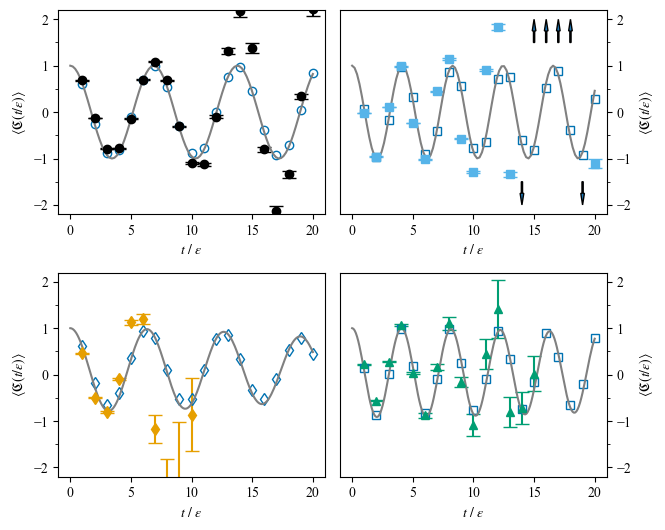

In [22]:
fig, ax = plt.subplots(ncols=2, nrows=2)
xpoints = np.linspace(1, 20, 20)
ax[0, 0].errorbar(xpoints, gv.mean(data_gvarm1n2), yerr=gv.sdev(data_gvarm1n2),
                  fmt=fmts[0], color=colors[0], capsize=5)
ax[0, 0].plot(xpoints, obs, fmts[0], fillstyle='none', color=colors[5])
ax[0, 0].plot(np.linspace(0, 20, 100), np.cos(0.91211607 * np.linspace(0, 20, 100)), label='exact', color='gray')
###################
ax[1, 0].errorbar(xpoints[:10], gv.mean(data_gvarm1n4)[:10], yerr=gv.sdev(data_gvarm1n4)[:10],
                  fmt=fmts[1], color=colors[1], capsize=5)
ax[1, 0].plot(xpoints, obs4, fmts[1], color=colors[5], fillstyle='none')
ax[1, 0].plot(np.linspace(0, 20, 200), e1, label='exact', color='gray')
###################
ax[0, 1].errorbar(xpoints, gv.mean(data_gvarm2n2), yerr=gv.sdev(data_gvarm2n2),
                  fmt=fmts[2], color=colors[2], capsize=5)
ax[0, 1].plot(xpoints, obs2, fmts[2], color=colors[5], fillstyle='none')

ax[0, 1].plot(np.linspace(0, 20, 100), np.cos( 1.51611001 * np.linspace(0, 20, 100)),
         color='gray', label='exact evolution')
xdown = [14, 19]
xup = [15, 16, 17, 18]
for x in xdown:
    ax[0, 1].arrow(x, -1.5, 0, -0.5, length_includes_head=True, width=0.1, head_length=0.25)
for x in xup:
    ax[0, 1].arrow(x, 1.5, 0, 0.5, length_includes_head=True, width=0.1, head_length=0.25)
###################
ax[1, 1].errorbar(xpoints[:15], gv.mean(data_gvarm2n4)[:15], yerr=gv.sdev(data_gvarm2n4)[:15],
                  fmt=fmts[3], color=colors[3], capsize=5)
ax[1, 1].plot(xpoints, obs3, fmts[2], color=colors[5], fillstyle='none')
ax[1, 1].plot(np.linspace(0, 20, 200), e2 ,
         color='gray', label='exact evolution')
# ax[1, 1].arrow(17, 1.5, 0, 0.5,  length_includes_head=True, width=0.1, head_length=0.25)
###################
ax[1, 1].yaxis.tick_right()
ax[0, 1].yaxis.tick_right()
# plt.arrow()
for i in range(4):
    ax[i // 2, i % 2].set_ylim(-2.2, 2.2)
    ax[i // 2, i % 2].set_yticks([-2, -1, 0, 1, 2])
    ax[i // 2, i % 2].set_yticks([-1.5, -0.5, 0.5, 1.5], minor=True)
    ax[i // 2, i % 2].set_xlabel(r'$t~/~\epsilon$')
    ax[i // 2, i % 2].set_ylabel(r'$\langle\mathfrak{C}(t/\epsilon)\rangle$')
    if i % 2 == 1:
        ax[i // 2, i % 2].yaxis.set_label_position('right')
# ax[1, 0].set_xlim(0, 10.5)
# ax[1, 1].set_xlim(0, 15.5)
fig.set_size_inches((3.375 * 2, 3.375 * 1.6))
fig.tight_layout()
fig.savefig('evolution_simv3.pdf')

In [106]:
data_fftfreq = fftfreq(len(data[0]),1.0)
data_dft = dft(data_gvar)
data_dft_abs2 = [i[0]**2. + i[1]**2. for i in data_dft]
data_dft_abs2_means = [i.mean for i in data_dft_abs2]
data_dft_abs2_stdev = [i.sdev for i in data_dft_abs2]

NameError: name 'dft' is not defined

<ErrorbarContainer object of 3 artists>

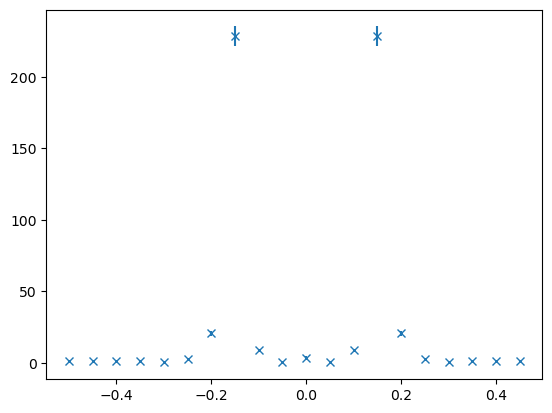

In [9]:
plt.errorbar(data_fftfreq,data_dft_abs2_means,yerr=data_dft_abs2_stdev,fmt="x")

In [20]:
y = {'data1' : data_dft_abs2}
x = {'data1' : data_fftfreq}

prior = {}
prior['a'] = gv.gvar(0.15,0.1)
prior['b'] = gv.gvar(1.0,1.0)
prior['c'] = gv.gvar(100.0,100.0)

def testfun(x, p):
    ans = {}
    for k in ['data1']:
        ans[k] =  p['c']/math.pi*(p['b']/((x[k]+p['a'])**2.+p['b']**2) + p['b']/((x[k]-p['a'])**2.+p['b']**2))
    return ans

fit = lsqfit.nonlinear_fit(data=(x, y), prior=prior, fcn=testfun, debug=True)
print(fit.format(maxline=True))       # print standard summary of fit

Least Square Fit:
  chi2/dof [dof] = 2.7e+02 [20]    Q = 0    logGBF = -2647.6

Parameters:
              a    -0.05 (10)     [  0.15 (10) ]  *
              b   9(7671)e-08     [  1.0 (1.0) ]  
              c       3 (100)     [  100 (100) ]  

Fit:
        key         y[key]         f(p)[key]
--------------------------------------------
    data1 0      3.5 (1.0)    0.00006 (5381)  ***
          1      0.49 (26)        1.426 (60)  ***
          2      8.8 (1.2)    0.00003 (2913)  *****
          3    228.6 (6.8)      10(8251)e-06  *****
          4     20.6 (2.0)       5(3998)e-06  *****
          5      3.00 (65)       3(2391)e-06  ****
          6      0.54 (31)       2(1601)e-06  *
          7      1.10 (45)       1(1151)e-06  **
          8      1.52 (53)        1(868)e-06  **
          9      1.15 (40)       8(6795)e-07  **
         10      1.41 (65)       6(5466)e-07  **
         11      1.15 (40)       8(6795)e-07  **
         12      1.52 (53)        1(868)e-06  **
         